<h1>Generate Heatmap</h1>
<p>In some applications, such as visual analytics for marketing, it is valuable to visualize object presence or attention focus via a heatmap. This algorithm creates a smooth heatmap over each detected object based on its bounding box (bbox).</p>

<h2>⚙️ Algorithm Steps:</h2>

<ol>
    <li><h3>Input:</h3></li>
    <ul>
        <li>An image (as a NumPy array)</li>
        <li>A list of bboxes, each in format <code>[x, y, width, height]</code></li>
    </ul>
    <li><h3>Generate heatmap for each bbox:</h3></li>
    <ol>
            <a name="extract_central_region"></a>
            <li><h4>Extract the cetral region per bbox</h4>
             <p>We extract a central region for each bbox based on an area_ratio, according to the following steps:</p>
                <ol>
                    <li>Compute the center of the bbox <code>(center_x, center_y)</code></li>
                    <li>Calculate the area of the bbox:</li>
                    <div style="text-align:center; font-family: 'Times New Roman', serif; font-size: 1.2em;">
                    <i><b>central_region_area</b></i> = <i><b>area</b></i> × <i><b>area_ratio</b></i>
                    </div>
                    <li>Calculate the side length of the square:</li>
                    <div style="text-align:center; font-family: 'Times New Roman', serif; font-size: 1.2em;">
                    <i><b>central_region_side</b></i> = &radic;<i><b>central_region_area</b></i>
                    </div>
                    <li>Define a square region centered at (center_x, center_y) with side length side_length</li>
                </ol>
                <p><b>The result after first step:</b></p>
                <div style="text-align: center;">
                <img src="https://github.com/saiwa-ai/rgb2heatmap/raw/main/resources/extract_central_region.gif" alt="Extract Central Region" style="max-width: 100%; height: auto;">
                </div>
             </li>
             <li><h4>Select a random point inside the central region</h4>
             <p>Randomly selected a pixel coordinate inside the central region.</p>
            <p><b>The result after second step:</b></p>
             <div style="text-align: center;">
             <img src="https://github.com/saiwa-ai/rgb2heatmap/raw/main/resources/select_random_point.gif" alt="Select Random Point" style="max-width: 100%; height: auto;">
             </div>
             </li>
             <a name="generate_gaussian_heatmap"></a>
             <li><h4>Generate Gaussian Heatmap</h4>
             <p>We generate a smooth 2D Gaussian heatmap centered on the selected pixel inside the bbox. This heatmap visually highlights the object with intensity fading outwards. To adapt to different object sizes and add slight randomness, we scale the Gaussian standard deviations (<code>sigma_x</code>, <code>sigma_y</code>) by a factor randomly sampled around the provided <code>sigma_ratio</code> (±0.1).</p>
             <p><b>The heatmap generation follows these steps:</b></p>
             <ol>
                <li>Sample a scaling factor <code>alpha</code> uniformly between <code>sigma_ratio - 0.1</code> and <code>sigma_ratio + 0.1</code>.</li>
                <li>Compute <code>sigma_x = alpha × bbox_width</code> and <code>sigma_y = alpha × bbox_height</code>.</li>
                <li>
                    For every pixel coordinate <code>(x, y)</code> on the <b>bbox</b> grid, calculate the heatmap value using the Gaussian formula:<br><br>
                    <div style="text-align: center;">
                    <img src="https://github.com/saiwa-ai/rgb2heatmap/raw/main/resources/gaussian_distribution.png" alt="Gaussian Distribution" style="max-width: 100%; height: auto;">
                    </div>
                </li>
            </ol>
            <p><b>Note</b> : Some bboxes may overlap in the image. When this happens, the corresponding heatmaps will also overlap. To accurately represent the combined intensity, we take the maximum value between overlapping heatmaps at each pixel, rather than summing them. This prevents artificially inflated values in the heatmap visualization.</p>
            </li>
            <li><h4>Normalize heatmap values</h4>
            <p>To scale the heatmap values to a consistent range for visualization and comparison, we apply min-max normalization. This rescales all heatmap values to the range <code>[0,1]</code> by subtracting the minimum value and dividing by the range:</p>
            <p align="center">
            <img src="https://github.com/saiwa-ai/rgb2heatmap/raw/main/resources/normalization.png" alt="Normalization" style="max-width: 100%; height: auto;">
            </p>
            <p><b>The result after fourth step:</b></p>
            <div style="text-align: center;">
            <img src="https://github.com/saiwa-ai/rgb2heatmap/raw/main/resources/generate_gaussian_heatmap.gif" alt="Generate Gaussian Heatmap" style="max-width: 100%; height: auto;">
            </div>
            </li>
    </ol>
            <li><h3>Visualization</h3><p>The final result will be as follows:<p>
            <div style="text-align: center;">
            <img src="https://github.com/saiwa-ai/rgb2heatmap/raw/main/resources/final_result.png" alt="Generate Gaussian Heatmap" style="max-width: 100%; height: auto;">
            </div>
            </li>
</ol>
<br/>




✅ To run this algorithm, follow the steps below in order:
You'll start by cloning the repository, installing dependencies, setting up the configuration, and then running the main script to process your image.

### 📥 Clone the Repository

We start by cloning the GitHub repository to access the codebase.

In [ ]:
# Clone the repository
!git clone https://github.com/saiwa-ai/rgb2heatmap.git

Cloning into 'rgb2heatmap'...
remote: Enumerating objects: 47, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 47 (delta 8), reused 6 (delta 6), pack-reused 37 (from 1)
Receiving objects: 100% (47/47), 55.63 MiB | 32.37 MiB/s, done.
Resolving deltas: 100% (13/13), done.


In [ ]:
# Change into the repository directory and install dependencies
%cd /content/rgb2heatmap

/content/rgb2heatmap


### 📦 Install Dependencies

Install Python packages listed in the `requirements.txt` file.

> ♻️ **Note:** After installing the dependencies, it's recommended to **restart the Colab runtime** to ensure all packages are properly loaded.

In [ ]:
# Install required packages
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.1 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of opencv-python to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 91.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 9.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.12.0.88
    Uninstalling opencv-python-4.12.0.88:
      Successfully uninstalled opencv-python-4.12.0.88
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have n

## 📸 Original Image Preview

Before running the main script, here's a sample input image.

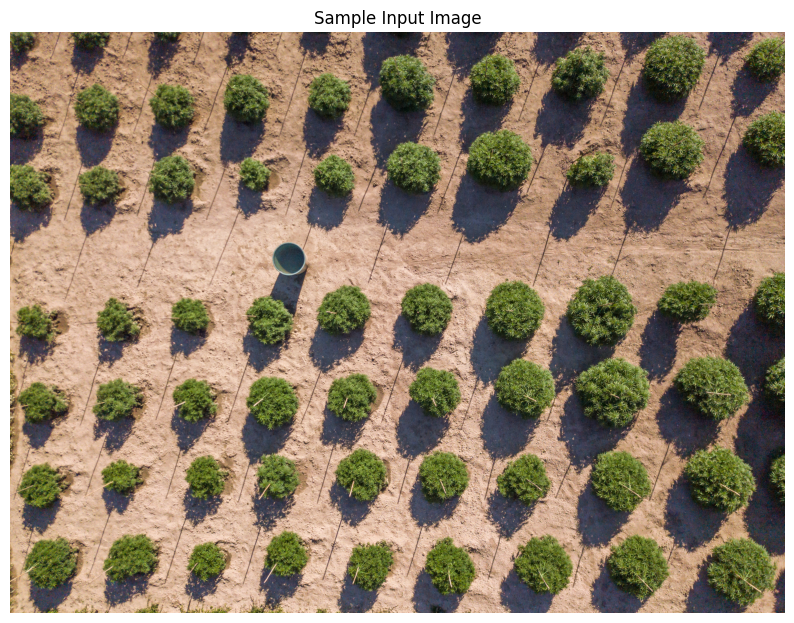

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Load the image
image_path = "/content/rgb2heatmap/test_data/images/test_1.png"
img = Image.open(image_path)

# Display using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.title('Sample Input Image')
plt.show()

<h2>🛠️ Set Configuration</h2>

<p><strong>🔔 Notes:</strong></p>
<ol>
  <li><code>input_annotation_path</code><strong>must</strong> follow the <strong>COCO format</strong>.</li>
  <li>If your annotations are in the <a href="https://saiwa.ai/fraime" target="_blank">Fraime</a> platform format, you can convert them to COCO using the
    <code>convert_fraime_to_coco.py</code> script located in the <code>utils/</code> directory.
  </li>
</ol>

<p><strong>📋 Parameters Description:</strong></p>

<table border="1" cellpadding="6" cellspacing="0">
  <thead>
    <tr>
      <th>key</th>
      <th>Type</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><code>input_annotation_path</code></td>
      <td>str</td>
      <td>Path to the COCO-formatted annotation file corresponding to the input image.</td>
    </tr>
    <tr>
      <td><code>image_path</code></td>
      <td>str</td>
      <td>Path to the image on which you want to run inference.</td>
    </tr>
    <tr>
      <td><code>output_dir</code></td>
      <td>str</td>
      <td>Directory where the output (the image) will be saved</td>
    </tr>
    <tr>
      <td><code>area_ratio</code></td>
      <td>float</td>
      <td>
        This parameter defines the relative area used when extracting the central region of each bounding box.<br/>
        For more information, please refer to <a href="#extract_central_region">Extract Central Region</a>.
      </td>
    </tr>
    <tr>
      <td><code>sigma_ratio</code></td>
      <td>float</td>
      <td>
        This parameter controls the spread of the Gaussian kernel during heatmap generation.<br/>
        For more information, please refer to <a href="#generate_gaussian_heatmap">Generate Gaussian Heatmap</a>.
      </td>
    </tr>
  </tbody>
</table>

<p>
Then set your desired configuration using the parameters above.</p>


In [ ]:
import json
from pathlib import Path

# Define configuration dictionary
configurations = {
    "input_annotation_path": "/content/rgb2heatmap/test_data/annotations/test_1.json",
    "image_path": "/content/rgb2heatmap/test_data/images/test_1.png",
    "output_dir": "/content/rgb2heatmap/output/",
    "area_ratio": 0.2,
    "sigma_ratio": 0.3
}

# Path to save the config file
config_path = Path("/content/rgb2heatmap/configs/config.json")

# Make sure the directory exists
config_path.parent.mkdir(parents=True, exist_ok=True)

# Save the dictionary as a pretty JSON file
with open(config_path, 'w') as f:
    json.dump(configurations, f, indent=4)

print(f"Configuration saved successfully at: {config_path}")

Configuration saved successfully at: /content/rgb2heatmap/configs/config.json


## 🚀 Run the Algorithm

This script processes the input image and annotation using the provided configuration.  
It generates heatmaps based on the annotation data and saves the results to the specified output directory.

> ✅ **Make sure you have already set your configuration file (`config.json`) before running this step.**


In [ ]:
# Change into the repository directory and run the algorithm
%cd /content/rgb2heatmap

/content/rgb2heatmap


In [ ]:
!python run_app.py "/content/rgb2heatmap/configs/config.json"

{
 "success": true,
 "result": "Saved heatmap overlay to: /content/rgb2heatmap/output/test_1.png",
 "error": null
}


## 🖼️ Preview Output
The following cell displays the processed output image generated by the main script.

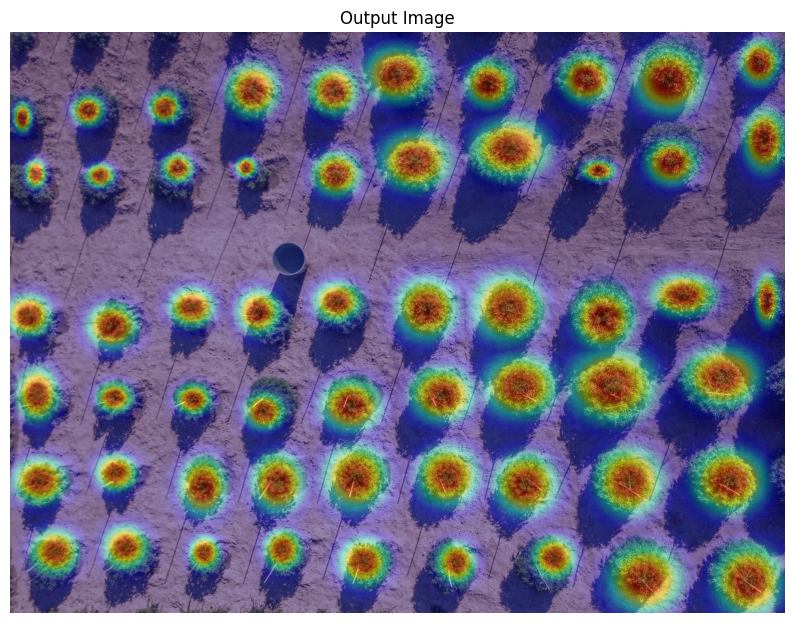

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Load the image
image_path = "/content/rgb2heatmap/output/test_1.png"
img = Image.open(image_path)

# Display using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.title('Output Image')
plt.show()